# Amazon Consumer Behaviour Strategic Analysis

In the rapidly evolving landscape of e-commerce, the ability to strategically leverage consumer data offers a significant competitive advantage. Drawing upon the skills I've honed in strategic thinking courses, along with my practical experiences from the "Business in Practice" module during my Master's program, I aim to delve deeply into the behavioral patterns and preferences of online shoppers.

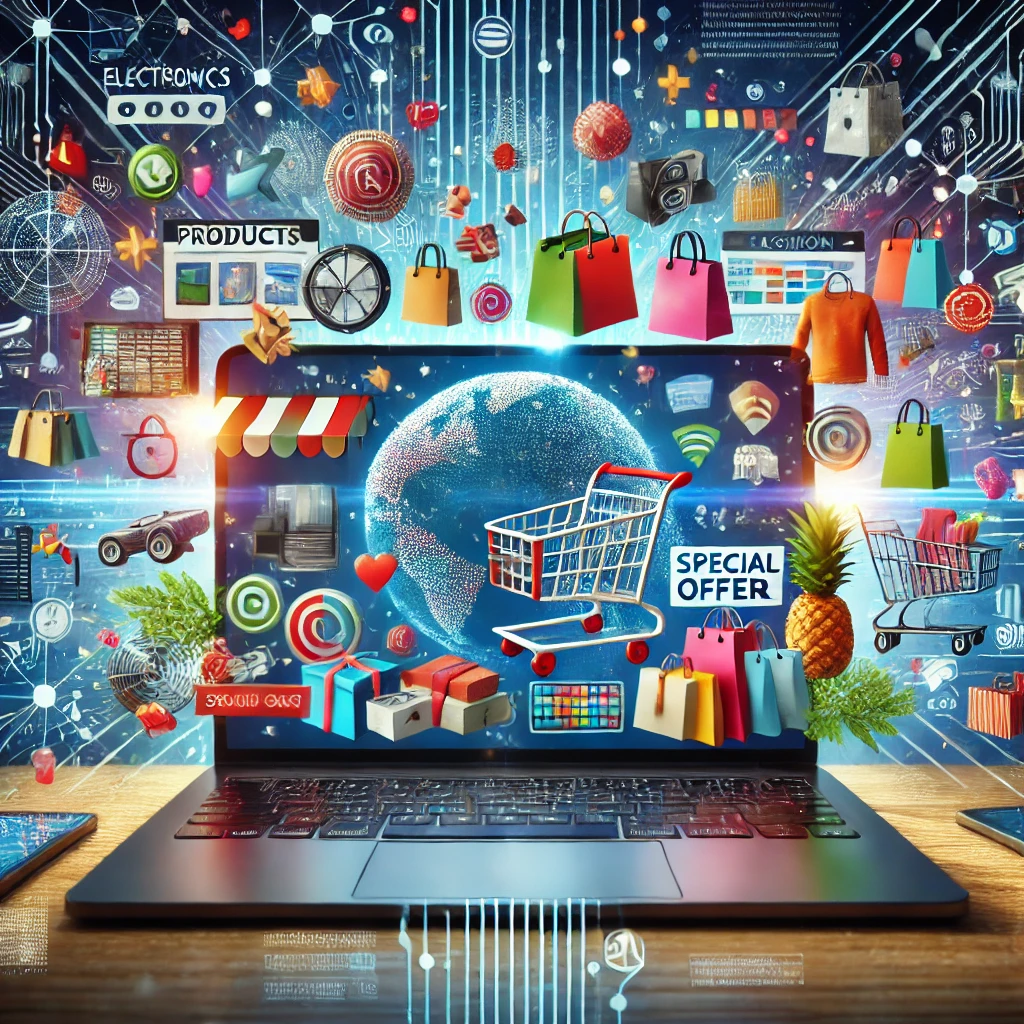

By examining various facets of consumer behavior, from the effectiveness of personalized recommendations to the influence of customer reviews on purchase decisions, this analysis seeks to uncover actionable insights that can refine customer experiences, enhance engagement, and drive business growth. Each segment of this investigation is designed not only to interpret data but also to implement strategic measures that align with contemporary business practices and technological advancements in the digital marketplace.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d swathiunnikrishnan/amazon-consumer-behaviour-dataset
!unzip amazon-consumer-behaviour-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset
License(s): other
  0% 0.00/15.5k [00:00<?, ?B/s]
100% 15.5k/15.5k [00:00<00:00, 24.8MB/s]
Archive:  amazon-consumer-behaviour-dataset.zip
  inflating: Amazon Customer Behavior Survey.csv  


In [4]:
import pandas as pd
data_main = pd.read_csv('/content/Amazon Customer Behavior Survey.csv')  # Reading the CSV file

In [5]:
# Best practices
# Creating a copy of the original dataset and performing transformations in the copy.

data = data_main.copy()

# Data Preprocessing

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


[Data Dictionary ](https://www.kaggle.com/datasets/swathiunnikrishnan/amazon-consumer-behaviour-dataset)

In [8]:
data.info()
data.describe()
# 22 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


# Missing Values, Null values and Duplicates

In [9]:
# NULL values
data.isna().sum()
# No NAs in columns except 2 in Product Search Method. Given the size of the data, we ignore these NAs for now.
# Depending on its requirement, we can choose to remove them or keep them as it is negligble.
data[data['Product_Search_Method'].isna()]

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
119,2023/06/06 2:07:12 PM GMT+5:30,21,Female,Once a month,Clothing and Fashion,Sometimes,Few times a week,NaN,Multiple pages,3,...,Often,No,Moderately,Sometimes,3,Sometimes,3,3,User-friendly website/app interface,Customer service responsiveness
382,2023/06/08 5:49:59 PM GMT+5:30,47,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,No,Multiple times a day,NaN,Multiple pages,1,...,Often,No,Moderately,No,2,No,3,2,Wide product selection,Shipping speed and reliability


In [10]:
# prompt: find empty values across data [generated using Gemini]

# Check for empty strings or whitespace-only strings in object columns
for col in data.select_dtypes(include=['object']):
    empty_or_whitespace = data[data[col].str.strip() == ''].shape[0]
    print(f"Column '{col}' has {empty_or_whitespace} empty or whitespace-only strings.")

Column 'Timestamp' has 0 empty or whitespace-only strings.
Column 'Gender' has 0 empty or whitespace-only strings.
Column 'Purchase_Frequency' has 0 empty or whitespace-only strings.
Column 'Purchase_Categories' has 0 empty or whitespace-only strings.
Column 'Personalized_Recommendation_Frequency' has 0 empty or whitespace-only strings.
Column 'Browsing_Frequency' has 0 empty or whitespace-only strings.
Column 'Product_Search_Method' has 0 empty or whitespace-only strings.
Column 'Search_Result_Exploration' has 0 empty or whitespace-only strings.
Column 'Add_to_Cart_Browsing' has 0 empty or whitespace-only strings.
Column 'Cart_Completion_Frequency' has 0 empty or whitespace-only strings.
Column 'Cart_Abandonment_Factors' has 0 empty or whitespace-only strings.
Column 'Saveforlater_Frequency' has 0 empty or whitespace-only strings.
Column 'Review_Left' has 0 empty or whitespace-only strings.
Column 'Review_Reliability' has 0 empty or whitespace-only strings.
Column 'Review_Helpfulness'

In [11]:
# Duplicates
if data.duplicated().all()==False:
  print("No Duplicates")
else:
  print("Duplicates found")


No Duplicates


# Exploratory Data Analysis

In [12]:
data.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

# Customer Behavior and Segmentation:
Utilize attributes like age, gender, purchase frequency, and browsing frequency to segment customers and analyze distinct behaviors within each group. Understanding these segments can help tailor marketing and product strategies to specific customer needs.

In [13]:
customer_segments = data[['age', 'Gender', 'Purchase_Frequency', 'Browsing_Frequency']]
print(customer_segments)

     age             Gender      Purchase_Frequency    Browsing_Frequency
0     23             Female       Few times a month      Few times a week
1     23             Female            Once a month     Few times a month
2     24  Prefer not to say       Few times a month     Few times a month
3     24             Female            Once a month     Few times a month
4     22             Female  Less than once a month     Few times a month
..   ...                ...                     ...                   ...
597   23             Female             Once a week      Few times a week
598   23             Female             Once a week      Few times a week
599   23             Female            Once a month      Few times a week
600   23             Female       Few times a month     Few times a month
601   23             Female             Once a week  Multiple times a day

[602 rows x 4 columns]


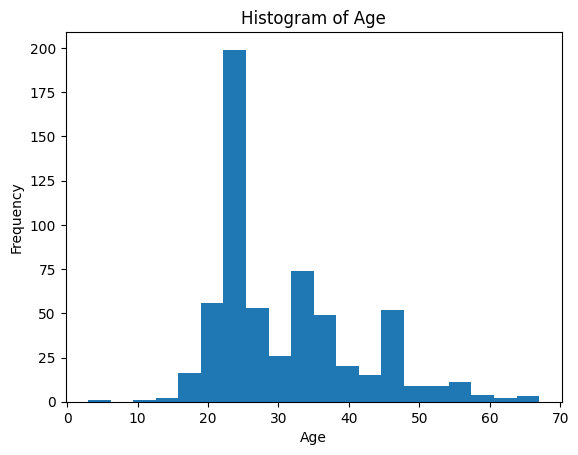

In [14]:
plt.hist(customer_segments['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

31
     age             Gender      Purchase_Frequency    Browsing_Frequency
20    64               Male             Once a week     Few times a month
80    58               Male            Once a month      Few times a week
92    62             Female  Less than once a month                Rarely
150   63               Male  Less than once a month                Rarely
163   60             Female             Once a week  Multiple times a day
442    3  Prefer not to say            Once a month      Few times a week
459   67             Female       Few times a month     Few times a month
489   67  Prefer not to say       Few times a month      Few times a week
536   60  Prefer not to say  Less than once a month     Few times a month
574   60               Male             Once a week     Few times a month


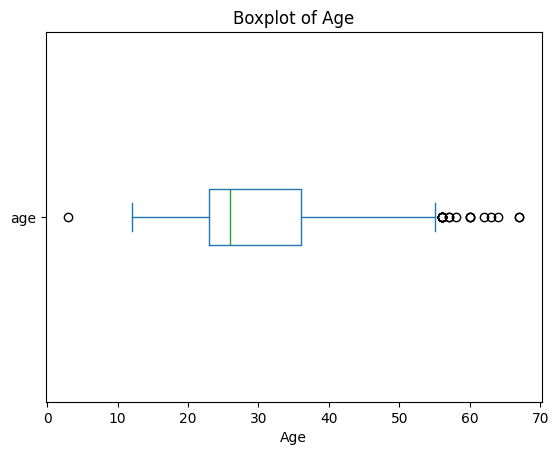

In [15]:
# Age
mean_age = customer_segments['age'].mean()
print(round(mean_age))

# Age - Boxplot
boxplot_age = customer_segments['age'].plot(kind='box', vert=False)
boxplot_age.set_title('Boxplot of Age')
boxplot_age.set_xlabel('Age')

outliers_age = np.logical_or(customer_segments['age'] > 57, customer_segments['age'] < 10)
# Get the indices where outliers_age is True
outlier_indices = customer_segments[outliers_age].index
# Print the outlier indices
outlier_records = customer_segments.loc[outlier_indices]
print(outlier_records)

In [16]:
# find mean of age where different browsing frequency and purchase frequency

mean_age_by_purchase_freq = customer_segments.groupby(['Purchase_Frequency'])['age'].mean().round()
print(mean_age_by_purchase_freq)


mean_age_by_browsing_freq = customer_segments.groupby(['Browsing_Frequency'])['age'].mean().round()
print(mean_age_by_browsing_freq)

Purchase_Frequency
Few times a month         32.0
Less than once a month    29.0
Multiple times a week     32.0
Once a month              29.0
Once a week               31.0
Name: age, dtype: float64
Browsing_Frequency
Few times a month       30.0
Few times a week        31.0
Multiple times a day    32.0
Rarely                  31.0
Name: age, dtype: float64


In [17]:
# which gender purchases more?

gender_freq = customer_segments['Gender'].groupby(customer_segments['Gender']).count()
print(gender_freq)

Gender
Female               352
Male                 142
Others                19
Prefer not to say     89
Name: Gender, dtype: int64


In [18]:
# which gender purchases more?

gender_purchase_pattern = customer_segments.groupby(['Gender', 'Purchase_Frequency']).size().unstack()
print(gender_purchase_pattern)


Purchase_Frequency  Few times a month  Less than once a month  \
Gender                                                          
Female                            125                      67   
Male                               33                      47   
Others                              8                       3   
Prefer not to say                  37                       7   

Purchase_Frequency  Multiple times a week  Once a month  Once a week  
Gender                                                                
Female                                 38            53           69  
Male                                   10            31           21  
Others                                  2             4            2  
Prefer not to say                       6            19           20  


In [19]:
# which gender browses more?

gender_browsing_pattern = customer_segments.groupby(['Gender', 'Browsing_Frequency']).size().unstack()
print(gender_browsing_pattern)


Browsing_Frequency  Few times a month  Few times a week  Multiple times a day  \
Gender                                                                          
Female                            109               154                    49   
Male                               41                64                    10   
Others                              7                 6                     4   
Prefer not to say                  42                25                    14   

Browsing_Frequency  Rarely  
Gender                      
Female                  40  
Male                    27  
Others                   2  
Prefer not to say        8  


In [20]:
# Convert categorical variables to numerical representations for correlation analysis
from sklearn.preprocessing import LabelEncoder

le_purchase = LabelEncoder()
customer_segments.loc[:, 'Purchase_Frequency_Encoded'] = le_purchase.fit_transform(customer_segments['Purchase_Frequency'])

le_browsing = LabelEncoder()
customer_segments.loc[:, 'Browsing_Frequency_Encoded'] = le_browsing.fit_transform(customer_segments['Browsing_Frequency'])

le_gender = LabelEncoder()
customer_segments.loc[:, 'Gender_Encoded'] = le_gender.fit_transform(customer_segments['Gender'])

# Calculate the correlation
correlation = customer_segments['Purchase_Frequency_Encoded'].corr(customer_segments['Browsing_Frequency_Encoded'])
print(f"Correlation between Purchase Frequency and Browsing Frequency: {correlation}")


Correlation between Purchase Frequency and Browsing Frequency: -0.041078306707611284


<ipython-input-20-b42acde41ebf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_segments.loc[:, 'Purchase_Frequency_Encoded'] = le_purchase.fit_transform(customer_segments['Purchase_Frequency'])
<ipython-input-20-b42acde41ebf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_segments.loc[:, 'Browsing_Frequency_Encoded'] = le_browsing.fit_transform(customer_segments['Browsing_Frequency'])
<ipython-input-20-b42acde41ebf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [21]:
print("Gender Mapping:")
gender_mapping = dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))
print(gender_mapping)

# Browsing Frequency Mapping
browsing_mapping = dict(zip(le_browsing.classes_, le_browsing.transform(le_browsing.classes_)))
print("\nBrowsing Frequency Mapping:")
print(browsing_mapping)

# Purchasing Frequency Mapping
purchasing_mapping = dict(zip(le_purchase.classes_, le_purchase.transform(le_purchase.classes_)))
print("\nPurchasing Frequency Mapping:")
print(purchasing_mapping)

Gender Mapping:
{'Female': 0, 'Male': 1, 'Others': 2, 'Prefer not to say': 3}

Browsing Frequency Mapping:
{'Few times a month': 0, 'Few times a week': 1, 'Multiple times a day': 2, 'Rarely': 3}

Purchasing Frequency Mapping:
{'Few times a month': 0, 'Less than once a month': 1, 'Multiple times a week': 2, 'Once a month': 3, 'Once a week': 4}


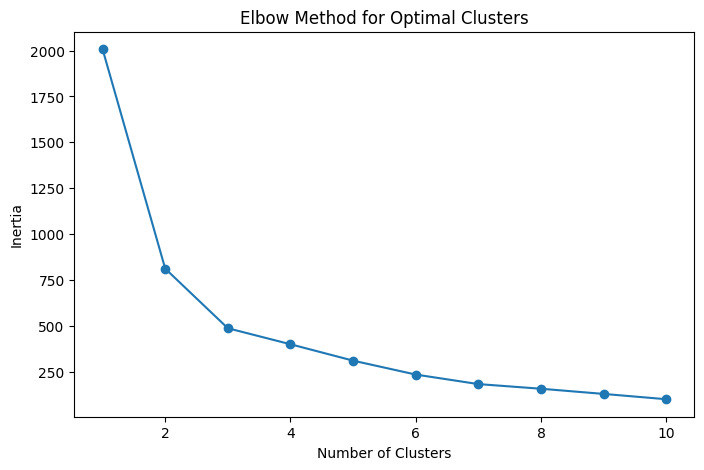

               age  Purchase_Frequency_Encoded  Browsing_Frequency_Encoded  \
Segment                                                                      
0        30.410526                    1.284211                    2.768421   
1        30.230769                    3.299595                    0.801619   
2        31.461538                    0.261538                    0.665385   

         Gender_Encoded  
Segment                  
0              0.673684  
1              0.789474  
2              0.723077  


<ipython-input-22-8bc7ae5fa4a6>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_segments['Segment'] = kmeans.fit_predict(X)


In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

X = customer_segments[['Purchase_Frequency_Encoded', 'Browsing_Frequency_Encoded']]

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
customer_segments['Segment'] = kmeans.fit_predict(X)

numeric_customer_segments = customer_segments.select_dtypes(include=['number'])
print(numeric_customer_segments.groupby('Segment').mean())

# Findings


1.   **Female** puchasing and browsing pattern is higher than others.
2.   Age range between **29-32** are the most frequent purchasers and browsers.
3.   Negligible correlation between purchase frequency and browsing frequency showing no strong relationship between the both.

# Segmentation Insights

## Segment 1: Extremities

*   **Purchase Pattern:** Less than once a month ~ Few times a week
*   **Browsing Pattern:** Multiple times a day ~ Rarely
*  **Reasoning/Insights:** These customers either purchase/browse a lot or they never turn up. This could reflect customer indecisiveness about their purchase.
*   **Recommendation:** Personalised recommendations, targeted marketing messages suggesting potential customer preferences

---



---


## Segment 2: Potential Loyalists

*   **Purchase Pattern:** Once a month ~ Once a week
*   **Browsing Pattern:** Few times a week
*  **Reasoning/Insights:** While the frequency of the customer purchases is moderate, there exists consistent customer interaction as reflected by the browsing pattern. Maybe they are price sensitive or they wait for a particular time period to initiate purchases. Targeting them can convert them to potential loyalists.
*   **Recommendation:** Offering deals and discounts frequently. Membership opportunities providing additional benefits to customers. Offering time bound offers and discounts.

---



---


## Segment 3: Casual Customers

*   **Purchase Pattern:** Few times a month
*   **Browsing Pattern:** Few times a month
*  **Reasoning/Insights:** Both purchases and browsing are moderately low.
*   **Recommendation:** Cross selling and upselling startegies can be undertaken to increase their basket rate even if they purchase a few times. Offering time bound offers and discounts.



# Part 2: Effectiveness of Personalized Recommendations:
Analyze how often customers interact with personalized recommendations and the reported helpfulness of these recommendations. Correlate this with shopping satisfaction and service appreciation to gauge the impact of personalization on customer experience.

In [120]:
data.columns

data = data.rename(columns={'Rating_Accuracy ': 'Rating_Accuracy'})
data = data.rename(columns={'Personalized_Recommendation_Frequency ': 'Recommendation_Freq'})

In [121]:
recommendations = data[['Recommendation_Freq', 'Recommendation_Helpfulness', 'Shopping_Satisfaction', 'Service_Appreciation']]
print(recommendations)

recommendations['Service_Appreciation'] = recommendations['Service_Appreciation'].replace('Customer service ', 'Customer service')
recommendations['Service_Appreciation'] = recommendations['Service_Appreciation'].replace('.', 'Unknown')


     Recommendation_Freq Recommendation_Helpfulness  Shopping_Satisfaction  \
0                      2                        Yes                      1   
1                      2                  Sometimes                      2   
2                      4                         No                      3   
3                      3                  Sometimes                      4   
4                      4                        Yes                      2   
..                   ...                        ...                    ...   
597                    3                  Sometimes                      4   
598                    3                  Sometimes                      3   
599                    3                  Sometimes                      3   
600                    2                        Yes                      2   
601                    3                  Sometimes                      3   

        Service_Appreciation  
0         Competitive prices  
1

<ipython-input-121-2f03ed987703>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendations['Service_Appreciation'] = recommendations['Service_Appreciation'].replace('Customer service ', 'Customer service')
<ipython-input-121-2f03ed987703>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendations['Service_Appreciation'] = recommendations['Service_Appreciation'].replace('.', 'Unknown')


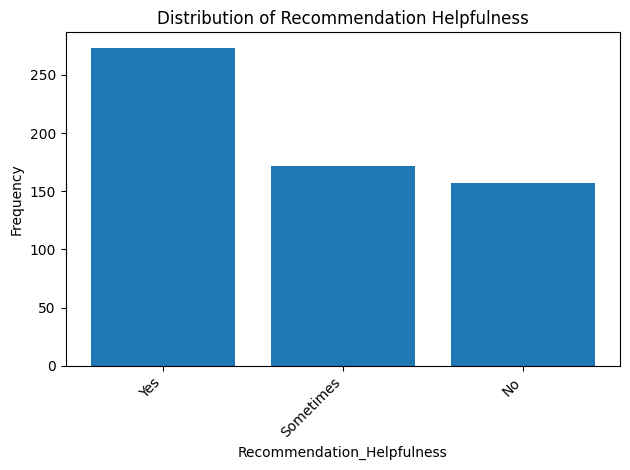

In [122]:
# bar plot for recommendation helfulness

categories = recommendations['Recommendation_Helpfulness'].unique()
frequencies = recommendations['Recommendation_Helpfulness'].value_counts()

plt.bar(categories, frequencies)
plt.xlabel("Recommendation_Helpfulness")
plt.ylabel("Frequency")
plt.title("Distribution of Recommendation Helpfulness")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Findings: Almost 50% of customers find the personalised recommendations offered to be helpful.
# With the remaining ranging between finding it somewhat helpful to not helful at all.

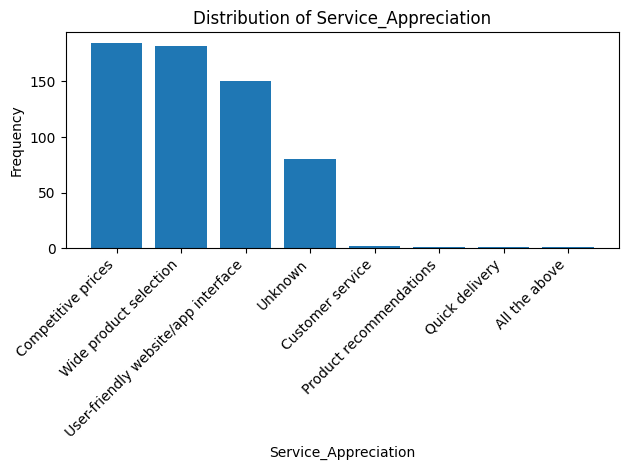

In [123]:
# service appreocation bar chart

plt.bar(recommendations['Service_Appreciation'].unique(), recommendations['Service_Appreciation'].value_counts())
plt.xlabel("Service_Appreciation")
plt.ylabel("Frequency")
plt.title("Distribution of Service_Appreciation")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [126]:
# prompt: group customer service, product recommendtions, quick delivery, all of the above as Others under Service Appreciation

# Group specified categories under 'Others' in 'Service_Appreciation'
recommendations['Service_Appreciation'] = recommendations['Service_Appreciation'].replace(['Customer service', 'Product recommendations', 'Quick delivery', 'All the above'], 'Others')
print(recommendations['Service_Appreciation'].value_counts())

Service_Appreciation
Others                                 189
Competitive prices                     182
Wide product selection                 150
User-friendly website/app interface     80
Unknown                                  1
Name: count, dtype: int64


<ipython-input-126-eed3f246f936>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendations['Service_Appreciation'] = recommendations['Service_Appreciation'].replace(['Customer service', 'Product recommendations', 'Quick delivery', 'All the above'], 'Others')


In [127]:
# encode recommendation helpfulness

le_recommendations_help = LabelEncoder()
recommendations.loc[:, 'Recommendation_Helpfulness'] = le_recommendations_help.fit_transform(recommendations['Recommendation_Helpfulness'])

le_service = LabelEncoder()
recommendations.loc[:, 'Service_Appreciation'] = le_service.fit_transform(recommendations['Service_Appreciation'])
print(recommendations)

     Recommendation_Freq Recommendation_Helpfulness  Shopping_Satisfaction  \
0                      2                          2                      1   
1                      2                          1                      2   
2                      4                          0                      3   
3                      3                          1                      4   
4                      4                          2                      2   
..                   ...                        ...                    ...   
597                    3                          1                      4   
598                    3                          1                      3   
599                    3                          1                      3   
600                    2                          2                      2   
601                    3                          1                      3   

    Service_Appreciation  
0                      0  
1        

In [128]:
# Recommendation Helpfulness mapping
recomm_helpful_mapping = dict(zip(le_recommendations_help.classes_, le_recommendations_help.transform(le_recommendations_help.classes_)))
print("Recommendation_Helpfulness:")
print(recomm_helpful_mapping)

# Service Appreciation mapping
service_mapping = dict(zip(le_service.classes_, le_service.transform(le_service.classes_)))
print("\Service Appreciation:")
print(service_mapping)


Recommendation_Helpfulness:
{'No': 0, 'Sometimes': 1, 'Yes': 2}
\Service Appreciation:
{'Competitive prices': 0, 'Others': 1, 'Unknown': 2, 'User-friendly website/app interface': 3, 'Wide product selection': 4}


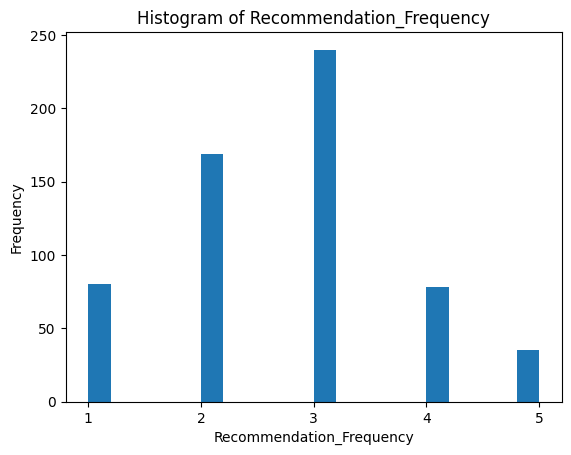

In [129]:
# Recommendation Frequency - how often customers receive recommendations? [time frame - ?]

plt.hist(recommendations['Recommendation_Freq'], bins=20)
plt.xlabel('Recommendation_Frequency')
plt.ylabel('Frequency')
plt.xticks([1,2,3,4,5])
plt.title('Histogram of Recommendation_Frequency')
plt.show()

The proportion satisfied is: 14


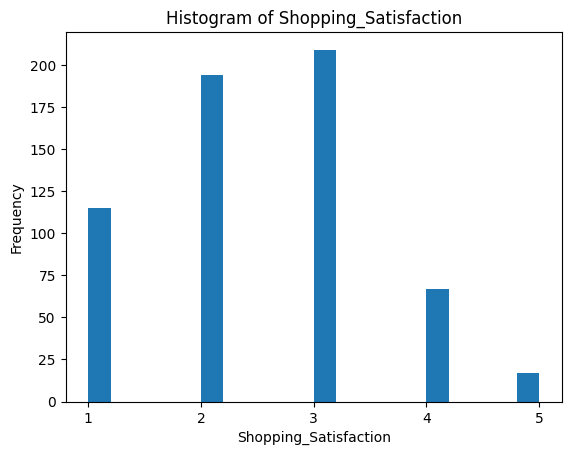

In [130]:
# Shopping Satisfaction

proportion_above4 = recommendations[ (recommendations['Shopping_Satisfaction'] >=4)  ]
proportion_satisfied = (len(proportion_above4)/len(recommendations))*100

print('The proportion satisfied is:', round(proportion_satisfied))

plt.hist(recommendations['Shopping_Satisfaction'], bins=20)
plt.xlabel('Shopping_Satisfaction')
plt.ylabel('Frequency')
plt.xticks([1,2,3,4,5])
plt.title('Histogram of Shopping_Satisfaction')
plt.show()


# Findings: The proportion of customers being dissatisfied or less likely satisfied is around 85%

In [131]:
recommendations.corr(method = 'spearman')

,Recommendation_Freq,Recommendation_Helpfulness,Shopping_Satisfaction,Service_Appreciation
Recommendation_Freq,1.000000,-0.133262,0.446945,-0.028814
Recommendation_Helpfulness,-0.133262,1.000000,-0.128377,0.120296
Shopping_Satisfaction,0.446945,-0.128377,1.000000,-0.019070
Service_Appreciation,-0.028814,0.120296,-0.019070,1.000000


In [132]:
# prompt: Recommendation_Helpfulness is encoded as 0, 1, 2. I want to check its correlation with other variables. However, I do not want to use spearman.

# Calculate the correlation using point-biserial correlation
from scipy.stats import pointbiserialr

# Iterate through columns and calculate point-biserial correlation
for col in recommendations.columns:
    if col != 'Recommendation_Helpfulness' and pd.api.types.is_numeric_dtype(recommendations[col]):
        correlation, p_value = pointbiserialr(recommendations['Recommendation_Helpfulness'], recommendations[col])
        print(f"Point-biserial correlation between Recommendation_Helpfulness and {col}: {correlation:.4f}")
        print(f"P-value: {p_value:.4f}")


# Calculate the correlation using point-biserial correlation
from scipy.stats import pointbiserialr

# Iterate through columns and calculate point-biserial correlation
for col in recommendations.columns:
    if col != 'Service_Appreciation' and pd.api.types.is_numeric_dtype(recommendations[col]):
        correlation, p_value = pointbiserialr(recommendations['Service_Appreciation'], recommendations[col])
        print(f"Point-biserial correlation between Service_Appreciation and {col}: {correlation:.4f}")
        print(f"P-value: {p_value:.4f}")

Point-biserial correlation between Recommendation_Helpfulness and Recommendation_Freq: -0.1393
P-value: 0.0006
Point-biserial correlation between Recommendation_Helpfulness and Shopping_Satisfaction: -0.1246
P-value: 0.0022
Point-biserial correlation between Service_Appreciation and Recommendation_Freq: -0.0358
P-value: 0.3800
Point-biserial correlation between Service_Appreciation and Shopping_Satisfaction: -0.0418
P-value: 0.3056


In [133]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(recommendations['Service_Appreciation'], recommendations['Recommendation_Helpfulness'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramer's V
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramer_v = (phi2 / min( (k-1), (r-1)))**0.5
print(f"Cramer's V: {cramer_v}")

Cramer's V: 0.1514630478037334


# Findings:
Consider
There exists a moderately positive relationship between
- Shopping Satisfaction [Low satisfaction (15%)]
- Recommendation Frequency


However, there exists no evident relationship with Recommendation Helpfulness [Note: It is encoded.] And also a weak association with Service_Appreciation.

Given the low satisfaction among customers with 3 being the highest in each group, Amazon must focus on improving the quality of the same. While there exists a positive relation among the variables, the proportion of customers with higher satisfaction is very less.

While 75% of customers find recommendations helpful or sometimes helpful, the non-existence of relationship with other variables indicate (i.e.) though recommendations are helpful it has negligible effect on customer shopping satisfaction and other attributes.

This can attribute to: **recommendation content, frequency and relevance**.